# Project: Investigate TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

Questions:
- Which genres are most popular year to year?
- What are characteristics of movies that have high revenues?
- What are characteristics of movies that have low user ratings? 
- Have movie characteristics changed over time? 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [42]:
# Load libraries being used 

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

### General Properties

In [43]:
# Inspect dataset

df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Any duplicated rows?

df.duplicated().sum()

1

In [5]:
# Any rows with missing values?

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Number of non-null unique values

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

discuss structure of data and any problems that need to be cleaned

### Data Cleaning

In [46]:
# drop unnecessary columns 
# id, imdb_id, budget, revenue, cast, homepage, tagline, keywords, overview, vote_count

df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count'], axis=1, inplace=True)

In [47]:
df.head()

popularity                original_title          director  runtime  \
0   32.985763                Jurassic World   Colin Trevorrow      124   
1   28.419936            Mad Max: Fury Road     George Miller      120   
2   13.112507                     Insurgent  Robert Schwentke      119   
3   11.173104  Star Wars: The Force Awakens       J.J. Abrams      136   
4    9.335014                     Furious 7         James Wan      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [48]:
# How many null values now?

df.isnull().sum()

popularity                 0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [49]:
# Drop null rows

df.dropna(inplace=True)
df.shape

(9807, 11)

In [50]:
# Any duplicates still?

df.duplicated().sum()

1

In [51]:
# Drop duplicated rows

df.drop_duplicates(inplace=True)

In [52]:
# Any data types that need to be fixed?

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   original_title        9806 non-null   object 
 2   director              9806 non-null   object 
 3   runtime               9806 non-null   int64  
 4   genres                9806 non-null   object 
 5   production_companies  9806 non-null   object 
 6   release_date          9806 non-null   object 
 7   vote_average          9806 non-null   float64
 8   release_year          9806 non-null   int64  
 9   budget_adj            9806 non-null   float64
 10  revenue_adj           9806 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 919.3+ KB


In [54]:
# release_date needs to be changed

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [55]:
# Any inappropriate values in rows?

df.describe()

popularity      runtime  vote_average  release_year    budget_adj  \
count  9806.000000  9806.000000   9806.000000   9806.000000  9.806000e+03   
mean      0.693143   102.744340      5.966459   2000.890271  1.935070e+07   
std       1.035525    28.134561      0.914291     13.032372  3.562179e+07   
min       0.000188     0.000000      1.500000   1960.000000  0.000000e+00   
25%       0.231581    90.000000      5.400000   1994.000000  0.000000e+00   
50%       0.418756   100.000000      6.000000   2005.000000  2.410618e+05   
75%       0.774231   112.000000      6.600000   2011.000000  2.439107e+07   
max      32.985763   877.000000      8.700000   2015.000000  4.250000e+08   

        revenue_adj  
count  9.806000e+03  
mean   5.685528e+07  
std    1.512243e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    4.255193e+07  
max    2.827124e+09

In [62]:
# budget_adj and revenue_adj

print("Rows with Zero Values in Budget Column:", df[(df['budget_adj']==0)].shape[0])
print("Rows with Zero Values in Revenue Column:", df[(df['revenue_adj']==0)].shape[0])

Rows with Zero Values in Budget Column: 4777
Rows with Zero Values in Revenue Column: 5054


In [64]:
# Replace 0 with Nan 

df['budget_adj'] = df['budget_adj'].replace(0, np.nan)
df['budget_adj'].describe()

count    5.029000e+03
mean     3.773174e+07
std      4.219944e+07
min      9.210911e-01
25%      8.831996e+06
50%      2.370705e+07
75%      5.082002e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [65]:
# Repeat for Revenue Column

df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)
df['revenue_adj'].describe()

count    4.752000e+03
mean     1.173238e+08
std      2.002502e+08
min      2.370705e+00
25%      1.163448e+07
50%      4.572316e+07
75%      1.348632e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [105]:
# Save as a clean dataset

df.to_csv('tmdb-movies-clean.csv', index=False)

(9806, 11)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

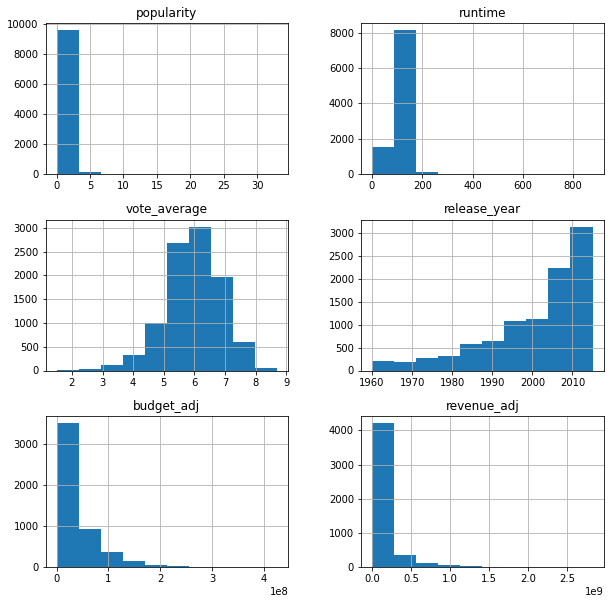

In [99]:
df = pd.read_csv('tmdb-movies-clean.csv')

df.hist(figsize=(10,10));

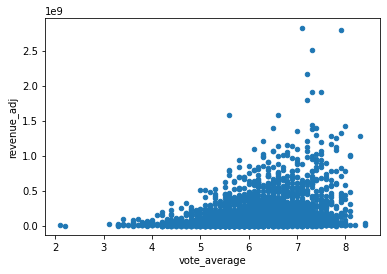

In [100]:
df.plot.scatter('vote_average', 'revenue_adj');

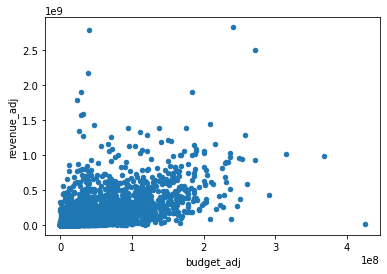

In [101]:
df.plot.scatter('budget_adj', 'revenue_adj');

In [102]:
# Which genre has the highest release of movies?

# create a new df with genres

genres = df['genres'].str.split('|', expand=False)

In [106]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object